In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [2]:
harden_id = find_players_by_full_name("James Harden")[0]['id']
houston_id = find_teams_by_full_name("Houston Rockets")[0]['id']

In [3]:
from pywaffle import Waffle

In [4]:
from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits

In [5]:
player_data = PlayerDashboardByShootingSplits(player_id=harden_id)

In [6]:
shots_df = player_data.get_data_frames()[6]

In [7]:
shots_df = shots_df.sort_values(by='FGM', ascending=False)

In [8]:
subset = shots_df.iloc[:7]

In [9]:
other = shots_df.iloc[7:].FGM.sum()

In [10]:
keys = subset.GROUP_VALUE.tolist() + ['Other']

In [11]:
values = subset.FGM.tolist() + [other]

In [12]:
data = {}
for index in range(len(keys)):
    data[f"{keys[index]}: {values[index]}"] = values[index]

In [13]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

Text(0.5, 1.0, 'Type of Shots Made by James Harden in 2019-20')

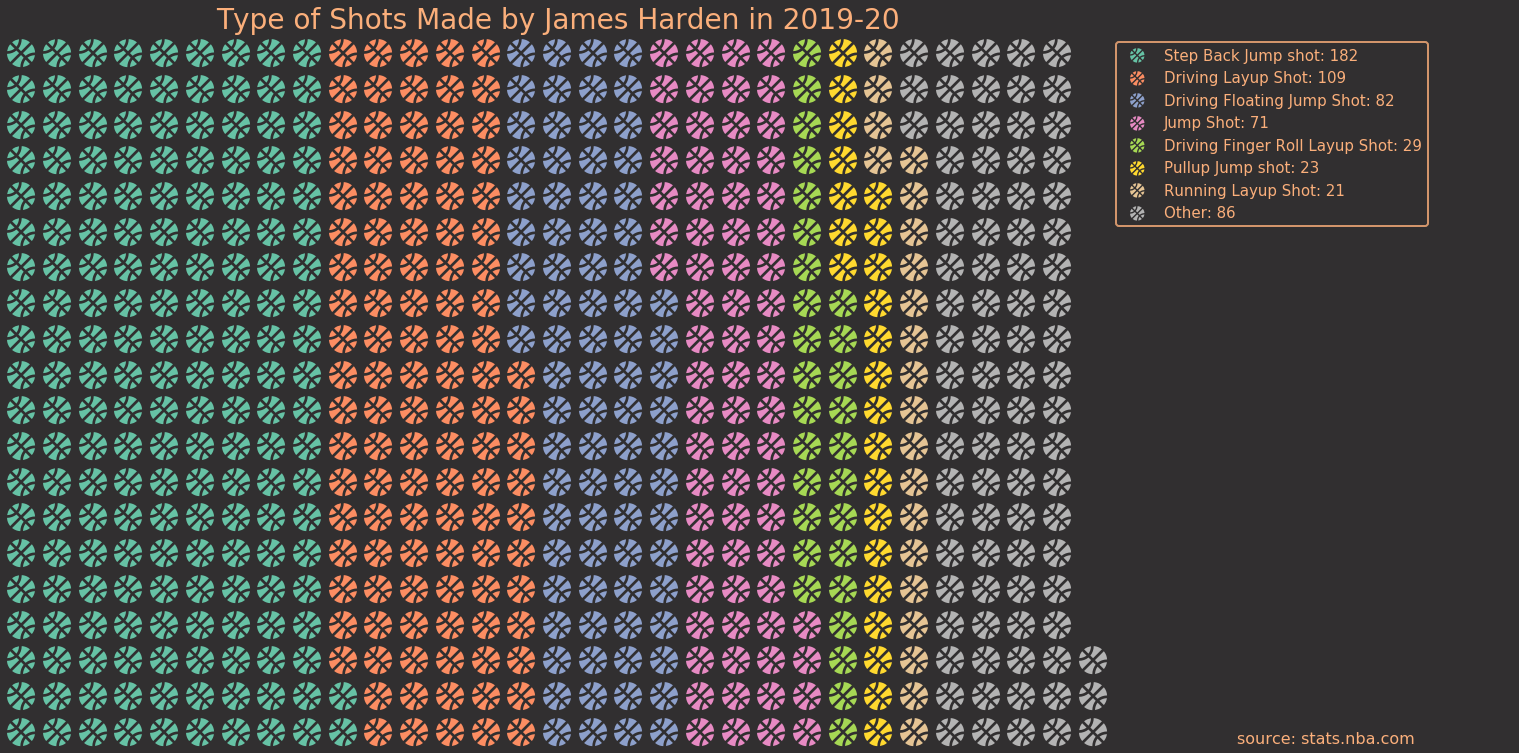

In [44]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20, 
    values=data,
    icons='basketball-ball',
    font_size=29,
    figsize=(21, 16),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 15},
    icon_legend=True,
)
fig.set_facecolor('#312f30')
axis = plt.gca()
legend = axis.get_legend()
frame = legend.get_frame()
frame.set_facecolor(bball_gray)
frame.set_linewidth(2)
frame.set_edgecolor(bball_light_orange)
for text in legend.get_texts():
    text.set_color(bball_light_orange)
axis.text(x=2.125, y=0, s='source: stats.nba.com                   ', color=bball_light_orange, size=16, ha='right')
#axis.imshow(img, extent=(1.5, 2.0, 0, 0.5), zorder=3)
#fig.figimage(img, xo=4.5, yo=1, )
#newax = fig.add_axes([0.75, 0, 0.25, 0.475], anchor='NE', zorder=3)
#newax.imshow(img, extent=(0.0, 1.0, 0.0, 0.73), zorder=6, )
#newax.axis('off')
#axis.set_xlim(0, 2)
axis.set_title("Type of Shots Made by James Harden in 2019-20", color=bball_light_orange, size=28)